# <center>Iris Classification 

#### Overview

#### About Dataset
#### Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

#### Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

## Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import pearsonr 

import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
data_frame = pd.read_csv("C:/Users/info/Downloads/IRIS.csv")
data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data preprocessing

In [3]:
# To check the Statistics of Data
data_frame.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# To check the DataTypes

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# To Check if the dataset has null values.

# If more than 15% of null value is present in the particular column. DROP the Column. 
# If it is less than 15% use Imputations techniques like Mean, Median and Mode. 

data_frame.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Check if the Duplicate rows exists. 
# If any duplicated row is found. Then remove the entire row. 

data_frame.duplicated().sum()

3

In [8]:
# Use Normalisation methods - StandardScalar, MinmaxScalar

data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Scaling the Features. 

# In this dataset the Inputs are Sepal length, Sepal Width, Petal length, and Petal Width
# The Outputs = Species

# X => Inputs -> SepalLenghtCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# Y => Ouput -> Species

features = ["sepal_length","sepal_width","petal_length","petal_width"]
x = data_frame[features].values #Input
y = data_frame["species"].values #Output

### Box plot

<Axes: >

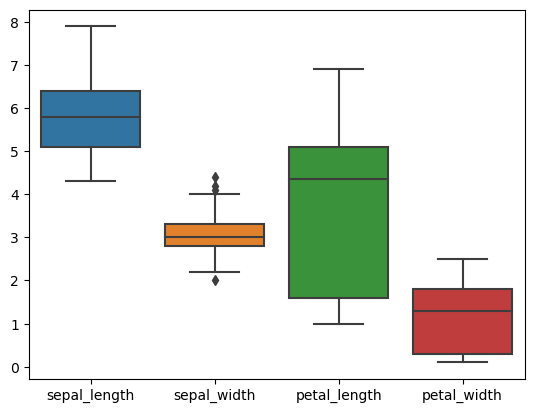

In [10]:
# Plotting the data to find outliers

sns.boxplot(data=data_frame)

### Joint Plot

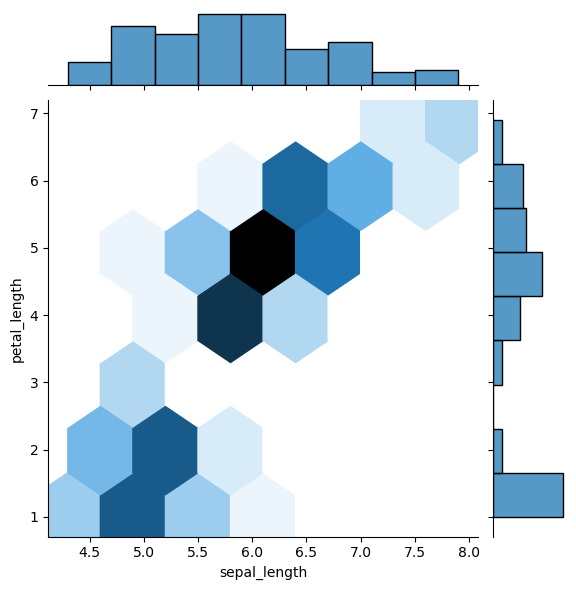

In [11]:
sns.jointplot(x=data_frame['sepal_length'], y=data_frame['petal_length'], data=data_frame, kind='hex')

### Pair plot

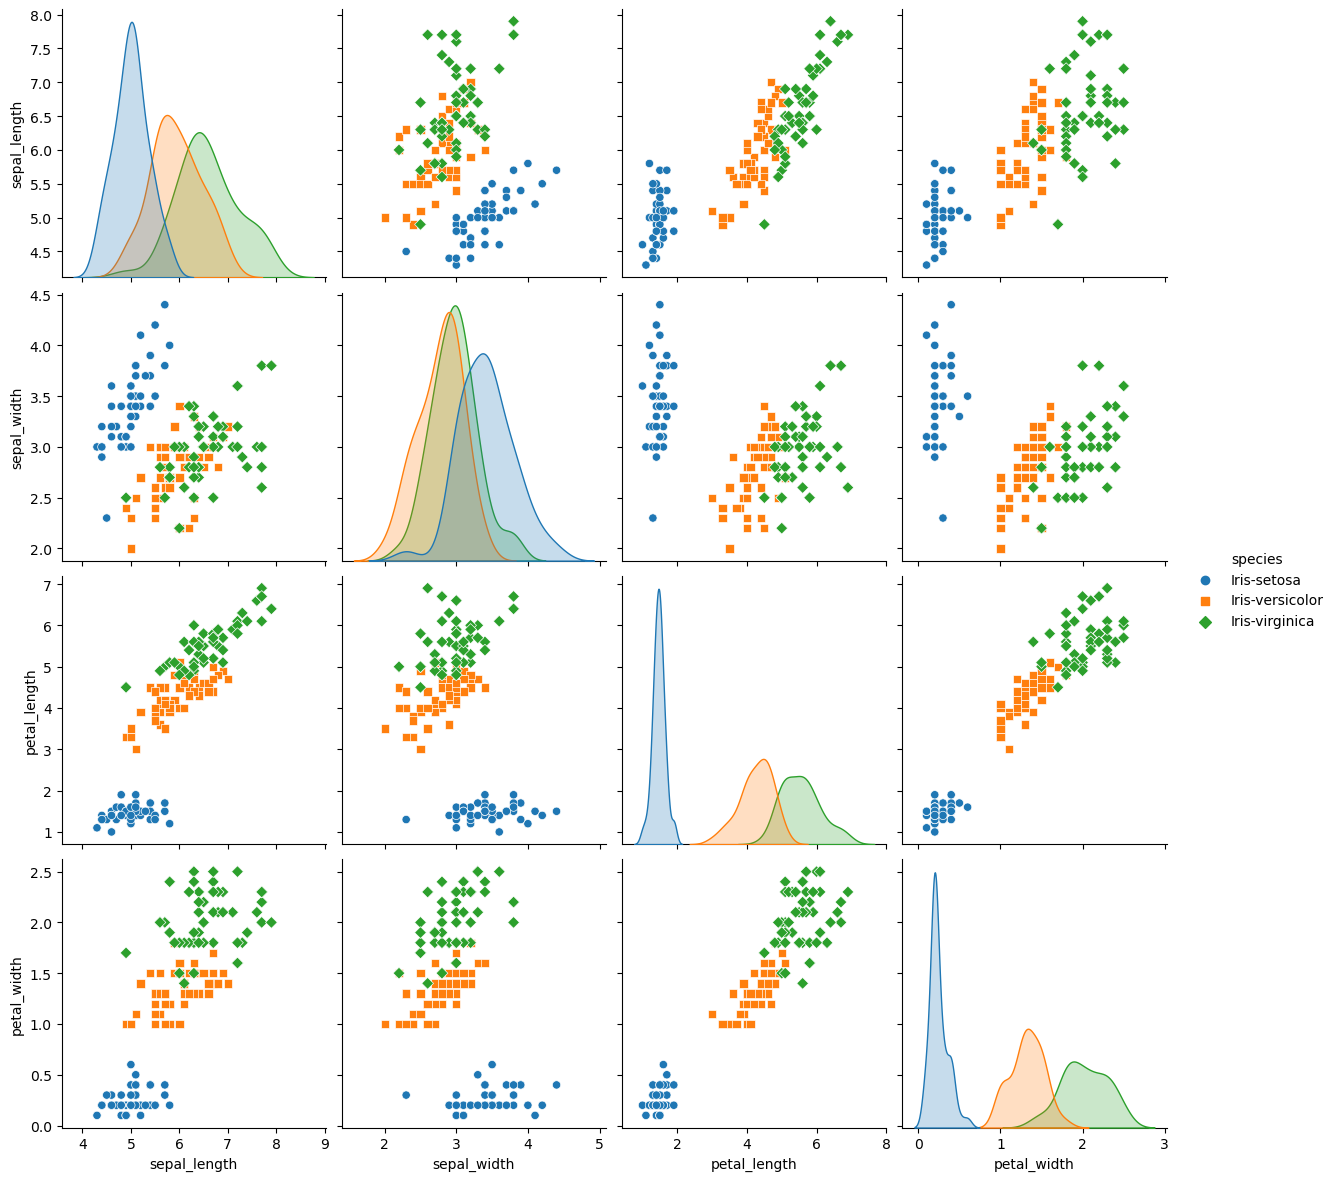

In [12]:
# Pair plot - to find the outliers

sns.pairplot(data_frame, hue="species", size=3, markers=["o", "s", "D"])

### Feature Scaling 

In [13]:
# Seperate the data set into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Label Encoder

In [14]:
# Label Encoder
# A technique is used in Machine Learning to convert categorical variables into numerical format.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [15]:
# dir(le)

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Use mapping method to add the index to decode the output. 

mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [17]:
y = le.transform(y)

### Standard Scaler

In [18]:
# Standard Scaler - To make all attribute values in a similar range (Normalization)
# Removes the mean and scales each feature/variable to unit variance. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [20]:
# Model Training  Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [21]:
# Fitting the values in Logistic Regression model
 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
model_prediction = model.predict(X_test_scaled)

In [23]:
accuracy_score(model_prediction, y_test)

1.0

### K-Nearest Neighbors

In [24]:
# Fitting the models in K-Nearest Neighbors (KNN)

classi = KNeighborsClassifier(n_neighbors=3)
classi.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
classi_pred = classi.predict(X_test_scaled)

In [26]:
accuracy_score(y_test, classi_pred)

0.9666666666666667

### Support Vector Classifier (SVC)

In [27]:
# Fitting the models in support Vector Classifier (SVC) 

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [28]:
svc_pred = svc.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, svc_pred)

1.0

### Naive Bayes

In [30]:
# Fitting the models in Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(X_train_scaled, y_train)

GaussianNB()

In [31]:
naive_b_pred = naive_b.predict(X_test_scaled)

In [32]:
accuracy_score(y_test, naive_b_pred)

0.9666666666666667

## Model Evaluation 

In [33]:
# Confusion Matrix

confusion_matrix(y_test, model_prediction)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [34]:
confusion_matrix(y_test, classi_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [35]:
confusion_matrix(y_test, svc_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [36]:
confusion_matrix(y_test, naive_b_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

## Combining all the model scores

In [37]:
# All Model Scores

results = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Score' : [1.0, 1.0, 0.96, 0.96]
})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
1.00,Logistic Regression
1.00,SVM
0.96,KNN
0.96,Naive Bayes


### Entire Model Prediction

In [38]:
# Model Prediction

model_prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [39]:
classi_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [40]:
svc_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [41]:
naive_b_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

## Model Building and Deployment

In [42]:
#### To save the model in a pkl file

import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))

In [43]:
# 2, 3, 4, 5

# load the scalar.pkl
with open('scaler.pkl', 'rb') as scaler_file:
    data = pkl.load(scaler_file)

In [44]:
type(data)

sklearn.preprocessing._data.StandardScaler

In [45]:
# Normalize using standard scalar 
sample_input = np.array([2.0, 5.8, 2.8, 4.2]).reshape(-1,4)
processdata = data.transform(sample_input)

In [46]:
processdata

array([[-4.58247406,  6.38606206, -0.57151125,  3.83969158]])

In [47]:
# load the model.pkl

with open('model.pkl', 'rb') as model_file: 
    model_data = pkl.load(model_file)

# Find ypred 
model_predict = model_data.predict(processdata)

# Print the predicted class with decoded catergory label
model_predict

array(['Iris-setosa'], dtype=object)